In [52]:
import numpy as np
import pandas as pd
from PIL import Image #converting image into arrays

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
mpl.style.use('ggplot')#ggplot-style

In [ ]:
df=pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                sheet_name="Canada by Citizenship",
                skiprows=range(20),
                skipfooter=2)

In [ ]:
df.head()

In [ ]:
df = df.drop(['Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49','Unnamed: 50'],1)

In [48]:
df.head(2)

,AreaName,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
df.shape

In [ ]:
df.drop(['AREA','REG','DEV','Type','Coverage'],1,inplace=True)

In [ ]:
df.columns = list(map(str,df.columns)) #make all column label of type string

In [ ]:
df.rename (columns ={'OdName':'Country','AreanName':'Continent','RegName':'Region'},inplace=True)

In [ ]:
df.set_index('Country',inplace=True) #set country name as index

In [47]:
df.head()

,AreaName,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [53]:
df['Total']=df.sum(axis=1)

In [54]:
years=list(map(str,range(1980,2014)))

In [55]:
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [59]:
#contoh membuat visualisasi waffle chart
df_dsn =df.loc[['Denmark','Norway','Sweden'],:]

In [60]:
df_dsn.head()

,AreaName,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [61]:
#Step 1: menentukan proporsi setiap kategori sehubungan dengan totalnya

In [63]:
#Compute the proportion of each category with respect to the total
total_values=sum(df_dsn['Total'])
category_proportions=[(float(value)/total_values)for value in df_dsn['Total']]

#Print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i]+':'+str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [67]:
#Step 2: menentukan ukuran keseluruhan dari waffle chart

In [71]:
widht = 40
height = 10
total_num_tiles=widht*height
print(total_num_tiles)

400


In [72]:
#Step 3: menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing masing kategori

In [75]:
tiles_per_category=[round(proportion*total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i]+':'+str(tiles))

Denmark:129
Norway:77
Sweden:194


In [76]:
#Step 4: Membuat matriks yang menyerupai wafel dan mengisinya

In [101]:
#Initialize the waffle chart as an empty matrix
waffle_chart=np.zeros((height,widht))

#define indices to loop through waffle chart
category_index = 0
tile_index = 0

#populate the waffle chart
for col in range(widht):
    for row in range(height):
        tile_index += 1
    
        #if the number of tiles populated for current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
        #....proceed to the next category
            category_index += 1
        
        #set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

In [102]:
waffle_chart


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

In [84]:
#Step 5: Petakan matriks waffle chart menjadi visual

<Figure size 432x288 with 0 Axes>

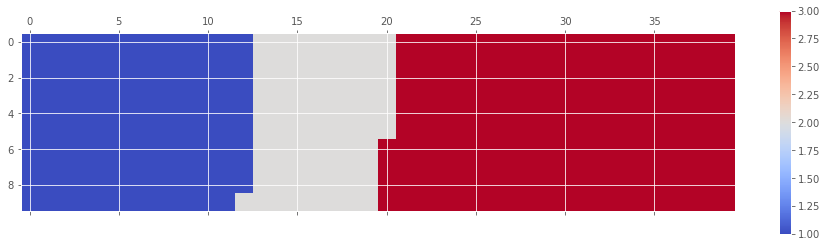

In [103]:
#instantiate a new figure object
fig =plt.figure()

#use matshow to display the waffle chart
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

In [89]:
#Step 6: Percantik Chart

([], [])

<Figure size 432x288 with 0 Axes>

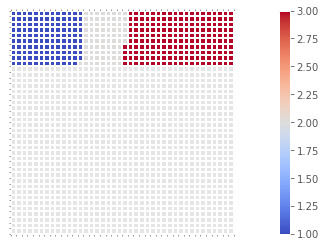

In [105]:
#instantiate a new figure object
fig =plt.figure()

#use matshow to display the waffle chart
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax=plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5,(widht),1),minor=True)
ax.set_yticks(np.arange(-.5,(widht),1),minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor',color='w',linestyle='-',linewidth=2)

plt.xticks([])
plt.yticks([])

In [106]:
#Step 7: Tambahkan Legend

In [114]:
#instantiate a new figure object
fig =plt.figure()

#use matshow to display the waffle chart
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax=plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5,(widht),1),minor=True)
ax.set_yticks(np.arange(-.5,(widht),1),minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor',color='w',linestyle='-',linewidth=2)

plt.xticks([])
plt.yticks([])

#compute cumulative sum of individual categories to match color schemes between chart and legend
valuse_cumsum= np.cumsum(df_dsn['Total'])
total_values=values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i,category in enumerate(df_dsn.index.values):
    label_str = category + '(' + str(df_dsn['Total'][i]) = ')'
    color_val =colormap(float(values_cumsum[i]/total_values)
legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

#add legend to chart
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(0.,-0.2,0.95, .1)
          )

SyntaxError: invalid syntax (<ipython-input-114-13307986791b>, line 31)